<a href="https://colab.research.google.com/github/spopp/image-transform/blob/master/Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

## Python Image Processing

with python3, matplotlib, numpy, and Pillow

In [0]:
# Jupyter Notebook can open an image file from the file system

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

try:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    from PIL import Image
except ImportError:
    print('To run this notebook install matplotlib, and Pillow for python3')

# take_photo taken from https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb
    
def take_photo(filename='Photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Snap Shot';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


Click the Snap Shot button at the top of the image.

(this code block taken from example: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb)

<IPython.core.display.Javascript object>

Saved to Photo.jpg


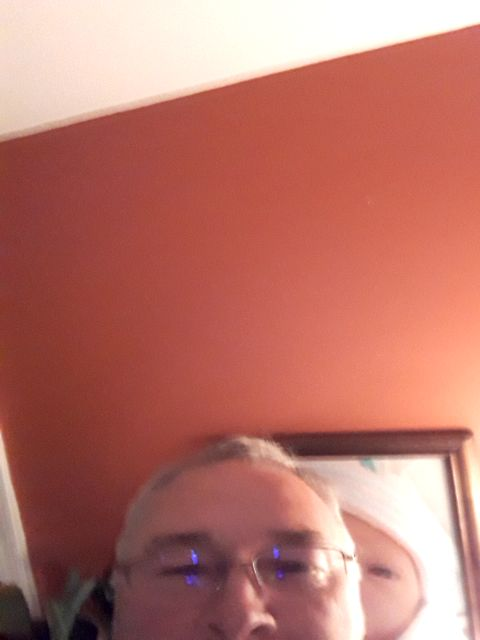

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Do a Spectrial analysis of the image captured in the cell below

Original code


Image file (try photo.jpg): Photo.jpg
Reading image: Photo.jpg
Processing the image


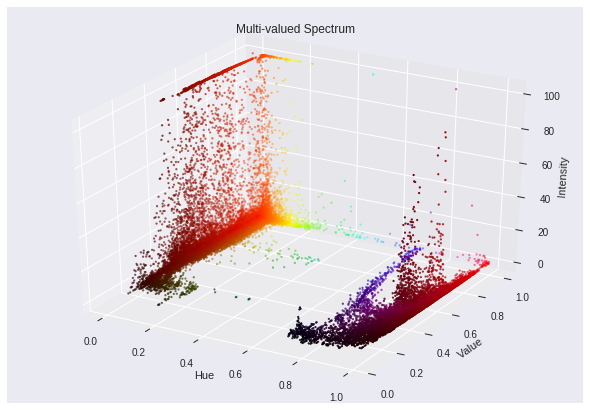

The 2D representation is wrong:
Processing the image


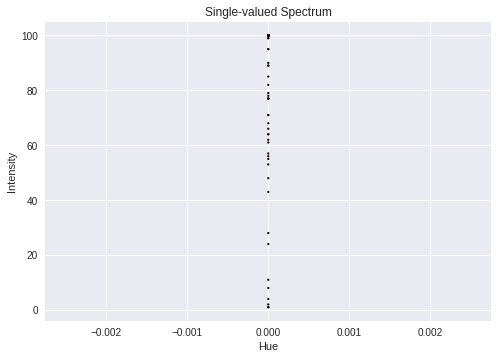

In [0]:
import argparse
import colorsys

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wdg  # Using the ipython notebook widgets

from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image



def rgb_spectrum(img, outfile=None, mono=False):

    """
    Create a multi-valued HSV Spectrum from an RGB

    Parameters:
    img - an opem image file of type PIL Image.Image
    outfile - optional output file name for saving the spectrial image produced
    mono - monochrome spectrum, or rgb spectrum

    Return:
    matplotlib.pyplot Object
    """
    if isinstance(img, Image.Image):
        # (2) Construct a blank matrix representing the pixels in the image
        print('Processing the image')
        xs, ys = img.size
        max_intensity = 100
        hues = {}
        pixel_access = img.load()

        # (3) Examine each pixel in the image file
        for x in range(0, xs):
            for y in range(0, ys):
                # ( )  Get the RGB color of the pixels
                try:
                    [r, g, b, _] = pixel_access[x, y]
                except ValueError:
                    [r, g, b] = pixel_access[x, y]

                # ( )  Normalize pixel color values
                if mono:
                    single = max(r, g, b)
                    r = single / 255.0
                    g = single / 255.0
                    b = single / 255.0
                else:
                    r /= 255.0
                    g /= 255.0
                    b /= 255.0

                # ( )  Convert RGB color to HSV
                [h, s, v] = colorsys.rgb_to_hsv(r, g, b)

                if h not in hues:
                    hues[h] = {}
                if v not in hues[h]:
                    hues[h][v] = 1
                else:
                    if hues[h][v] < max_intensity:
                        hues[h][v] += 1

        # ( )   Decompose the hues tree into a set of dimensional arrays
        h_ = []
        v_ = []
        i = []
        colours = []

        for h in hues:
            for v in hues[h]:
                h_.append(h)
                v_.append(v)
                i.append(hues[h][v])
                [r, g, b] = colorsys.hsv_to_rgb(h, 1, v)
                colours.append([r, g, b])

        # ( )   Plot the graph!
        fig, ax = plt.subplots()

        if not mono:
            ax = Axes3D(fig)
            ax.scatter(h_, v_, i, s=5, c=colours, lw=0)
            ax.set_xlabel('Hue')
            ax.set_ylabel('Value')
            ax.set_zlabel('Intensity')
            ax.set_title('Multi-valued Spectrum')
        else:
            ax.scatter(h_, i, s=5, c=colours, lw=0)
            ax.set_xlabel('Hue')
            ax.set_ylabel('Intensity')
            ax.set_title('Single-valued Spectrum')

        if outfile is not None:
            print('Saving spectral image to {}'.format(outfile))
            fig.savefig(fname=outfile, pad_inches=0.5)

        return plt

    
def get_bool(prompt, default=False):
    """Get a true or false answer from the user"""
    while True:
        try:
            return {"true":True,"false":False}[input(prompt).lower()]
        except KeyError as ex:
            print(ex)
            return default

    
def main():
    
    filename = input('Image file (try photo.jpg): ')
    # mono = get_bool('Get a 2D image (default False)?')
    
    print('Reading image: {}'.format(filename))
    image_file = Image.open(filename)

    plot = rgb_spectrum(image_file, mono=False)
    plot.show()
    
    print('The 2D representation is wrong:')
    plot2 = rgb_spectrum(image_file, mono=True)
    plot2.show()
    

main()